# Fandango Rating Analysis Project

The goal of this project is to analyze inconsistencies in the movie ratings of the fandango website. When compared to the actual scores that can be found in the HTML code of the site, the ratings have in the past been skewed towards higher ratings. For example a rating of 4.1 will be rounded to 4.5 instead of 4.0. Fandango claimed that this was unintentional and caused by a bug. Since the bug should be fixed at this point, we will try to find out if the inconsistencies are still present.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [2]:
# Read in the Datasets
ratings_old = pd.read_csv('fandango_score_comparison.csv')
ratings_new = pd.read_csv('movie_ratings_16_17.csv')

In [10]:
fandango_old = ratings_old[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue',
                          'Fandango_votes', 'Fandango_Difference']]
fandango_new = ratings_new[['movie','year', 'fandango']]
    

In [81]:
fandango_old.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


## Population

The population to this analysis is all of the movie ratings both before and after the investigation on the validity of the vandango rating system. 
The samples we have are samples from before the investigation and after the investigation.

## Sampling

We have two samples available to us:
* a sample provided by Hickey, who originally investigated inconsistencies with the vandango rating system. He excluded movies:
    * That had less than 30 user ratings on Fandango by the time of the sampling (24.08.2015)
    * That did not have ticket sales in 2015
    --> By doing this he excluded a lot of movies, especially less popular ones.
    
* a later sample. This sample excluded movies:
    * released before 2016
    * without a lot of reviews (exact number unclear)

This means:
Our two samples are:
* Not representative of the whole population. This is due to the fact that each author chose to eliminate a considerable amount of movie ratings. This will skew our results.
* Not comparable to each other. Since the people responsible for the two samplings used different criteria to exclude data, the two datasets will likely have differing results.

## New goals:

Since the sampled data is neither representative nor are the two datasets comparable, we will need to re-evaluate our initial goal setting.
As a large part of the less popular movies have been excluded, out new population will be comprised only on popular movies. In fact we will be working with two populations:
* popular movies in the first 8 months of 2015
* popular movies in 2016 or later

To be able to compare the two results, we have to try to exclude all movies that would have been excluded in the sampling with the stricter sampling rules.

The goal will still be to find out if there has been a shift in the Fandango movie review aggregation process before and after the investigation, but due to these constraints we will be limiting ourselves to the more popular movies

## Overview over the data contained in our datasets

Finding out which type of movies were selected:

count      146.000000
mean      3848.787671
std       6357.778617
min         35.000000
25%        222.250000
50%       1446.000000
75%       4439.500000
max      34846.000000
Name: Fandango_votes, dtype: float64


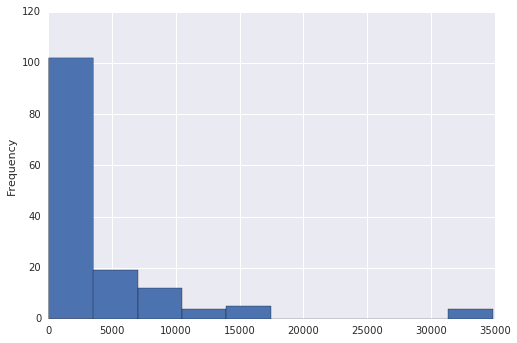

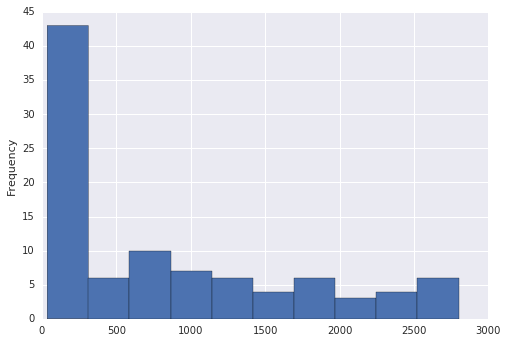

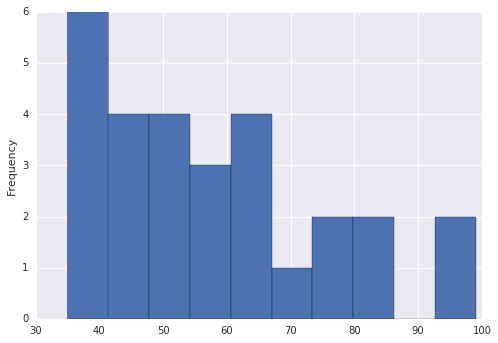

In [19]:
print(fandango_old.Fandango_votes.describe())
fandango_old.Fandango_votes.plot.hist()
plt.show()
fandango_old.Fandango_votes[fandango_old.Fandango_votes < 3000].plot.hist()
plt.show()
fandango_old.Fandango_votes[fandango_old.Fandango_votes < 100].plot.hist()
plt.show()



This means the lowest amount of ratings in the dataset containing movies from 2015 is 35. The table shows that half of our movies are rated less than 1500 times.

### New dataset

In our second dataset the movie ratings are selected by including only popular movies. The dataset unfortunately has no equivalent to the fandango_ratings column, so we have no clear sense of what the author judged to be 'popular'. We could find a number of movies and check them manually

In [23]:
fandango_new.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


When checking the amount of ratings in the current day (October 2019) there was a tooltip on the site saying that the 5 star rating of Fandango was replaced by the rotten tomatoes ratings. This could imply that the company wasn't able to move past the controversy caused by their ratings system. It also precludes me from looking up current rating numbers of movies. But the movies in this project are at this point already 3 years old, so the current rating numbers would not be the most useful gauge of popularity. For this reason, I will be using the rating numbers from the solution:

|Movie                                  |   # User Ratings|
|:-------------------------------------:|----------------:|
|Mechanic: Resurrection                 |             2247|
|Warcraft                               |             7271|
|Max Steel                              |              493|
|Me Before You                          |             5263|
|Fantastic Beasts and Where to Find Them|            13400|
|Cell                                   |               17|
|Genius                                 |              127|
|Sully                                  |            11877|
|A Hologram for the King                |              500|
|Captain America: Civil War             |            35057|



We can see that the majority of movies in this sampling are very popular. We do have one outlier, however: Cell with only 17 ratings. So the inclusion criterium for the second dataset isn't how many user ratings a movie received.

## Exclude movies not released in 2015 or 2016

Included in the datasets are movies not released in 2015 or 2016. These need to be excluded.

In [74]:
# Finding the movies released in 2015 in the old Fandango dataset

fandango_2015 = fandango_old.loc[fandango_old.FILM.str.contains('\(2015\)')]

In [76]:
fandango_2016 = fandango_new[fandango_new.year == 2016]